# CMSC478 Machine Learning

# Assignment-3: Ensemble Methods and PCA

*Type your name and ID here* 

## Overview and Learning Objectives

You've learnt about Ensemble Methods and how to use weak predictors to create strong predictors by combining them in different ways. You also learned that "Curse of Dimensionality" is a common challenge in ML and how PCA can help in dimensionality reduction.

In Part I of this assignment, you are going to build and compare three ensemble methods on diabetes dataset. In Part II, you will transform your data to a lower dimensional space using PCA.

Pedagogically, this assignment will help you:
- better understand Ensemble Methods, as well as Random Forests.

- better understand how to perform dimensionality reduction using PCA.

- practice plotting ROC curves.

## Part I - Ensemble Methods

You are going to use "Ensemble" of classifiers with the followig ensemble methods:

- Random Forests

- AdaBoost

- Gradient Boosting

First [download the data](https://www.kaggle.com/uciml/pima-indians-diabetes-database) `diabetes.csv` and store it in the same working directory.

In [1]:
# Import necessary Python modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.decomposition import PCA

In [2]:
# Load diabetes data with Pandas, it should be in the same working directory.
df = pd.read_csv("diabetes.csv")

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Create X, y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [4]:
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


## <font color="red"> Required Coding

In [5]:
# Create a random forest classifier with 100 estimators and max_leaf_nodes=16 and n_jobs=-1
### START CODING HERE ###
rf_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 16, n_jobs = -1)
### END CODING HERE ###

In [7]:
# Perform a 10-fold cross validation with 'roc_auc' as scoring and print the cv_score mean
### START CODING HERE ###
rf_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring = 'roc_auc')
### END CODING HERE ###
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

Mean AUC Score - Random Forest:  0.8367720797720798


> Now, plot the impact of varying `n_estimators` on cv scores (mean auc). This may take a few minutes to generate the plot.

## <font color="red"> Required Coding

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


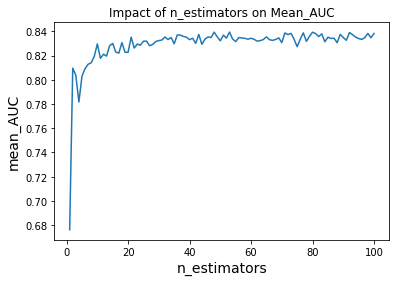

In [9]:
# Create a range of 1 to 100 and an empty list for n_estimators and mean_auc
N_Estimators = range(1, 101)
Mean_AUC = []

### START CODING HERE ###
# Write a for loop that does the following steps:
# iterate over n_estimators in N_Estimators
for i in N_Estimators:
    # create rf_clf in each iteration passing n_estimators and other params
    rf_clf = RandomForestClassifier(n_estimators=i, max_leaf_nodes = 16, n_jobs = -1)
    # do 10-fold cross validation on X and y with scoring='roc_auc'
    rf_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring = 'roc_auc') 
    # compute the mean of the rf_cv_score and append it to Mean_AUC
    Mean_AUC.append(rf_cv_score.mean())
### END CODING HERE ###

plt.title('Impact of n_estimators on Mean_AUC')
plt.xlabel('n_estimators', fontsize=14)
plt.ylabel('mean_AUC', fontsize=14)
plt.plot(N_Estimators, Mean_AUC)

> You can now use `feature_importances_` to see the importance of each feature in the random forest classifier. As mentioned in the lecture, it is measured based on how much the tree nodes that use that feature reduce impurity on average.

In [36]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train,y_train)

# Get feature_importances for all features
for name, score in zip(df, rf_clf.feature_importances_):
    print(name, score)

[0.05976985 0.36756672 0.04558664 0.04746109 0.07512599 0.1612264
 0.08633552 0.15692778]
Pregnancies 0.0597698489792814
Glucose 0.3675667214949448
BloodPressure 0.04558664211172642
SkinThickness 0.04746109382969909
Insulin 0.07512598718354198
BMI 0.1612264047449021
DiabetesPedigreeFunction 0.08633552472361401
Age 0.15692777693229024


> Now, plot the ROC curve. Notice how [class probabilities](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba), tpr (true positive rate) and fpr (flase positive rate) should be computed for plotting ROC. Notice that Mean AUC Score might be slightly different from the AUC_RF computed below due to averaging in cv.

In [11]:
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0.5, 0, 'False Positive Rate')

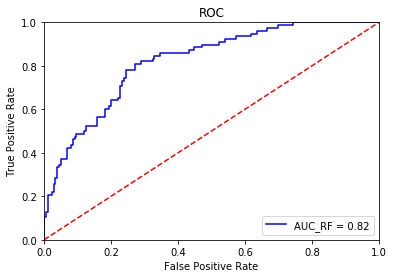

In [12]:
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

> Now do the exact same steps with AdaBoost.

## <font color="red"> Required Coding

In [25]:
# Create AdaBoost ensemble of DecisionTreeClassifier(max_depth=2), n_estimators=5, algorithm="SAMME.R", learning_rate=0.25
### START CODING HERE ###
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=5, algorithm="SAMME.R", learning_rate=0.25)

# Fit the rf_clf on the training set
ada_clf.fit(X_train,y_train)


# Perform a 10-fold cross validation with 'roc_auc' as scoring and print the cv_score mean
ada_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring = 'roc_auc') 
### END CODING HERE ###
print("Mean AUC Score - AdaBoost: ", ada_cv_score.mean())

Mean AUC Score - AdaBoost:  0.8329287749287747


>And do the same with Gradient Boosting.

In [26]:
# Create GradientBoostingClassifier ensemble of max_depth=2, n_estimators=5, learning_rate=0.25
### START CODING HERE ###
gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=5, learning_rate=0.25)

# Fit the rf_clf on the training set
gb_clf.fit(X_train, y_train)

# Perform a 10-fold cross validation with 'roc_auc' as scoring and print the cv_score mean
gb_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring = 'roc_auc')
### END CODING HERE ###
print("Mean AUC Score - Gradinet Boosting: ", gb_cv_score.mean())

Mean AUC Score - Gradinet Boosting:  0.8369059829059828


>Now plot the ROC for all three ensembles in one plot, similar to the plot for random forest. AUC scores for each ensemble should be shown on the lower right. <b>Hint:</b> You should compute the probs, preds, fpr, tpr, threshold, and roc_auc for each ensmeble separately. Use different variable names for each ensemble to store them.

## <font color="red"> Required Coding

Text(0.5, 0, 'False Positive Rate')

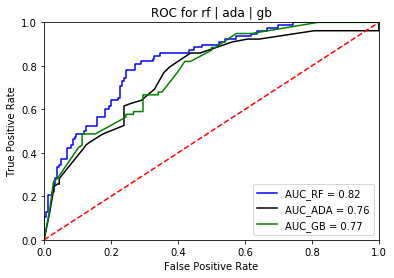

In [27]:
# Plot ROC for all three ensemble methods in one plot with AUC scores shown on the 'lower right' of the plot.
# Write as many number of lines as needed.
### START CODING HERE ###
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

ada_probs = ada_clf.predict_proba(X_test)
ada_preds = ada_probs[:,1]
ada_fpr, ada_tpr, ada_threshold = metrics.roc_curve(y_test, ada_preds)
ada_roc_auc = metrics.auc(ada_fpr, ada_tpr)

gb_probs = gb_clf.predict_proba(X_test)
gb_preds = gb_probs[:,1]
gb_fpr, gb_tpr, gb_threshold = metrics.roc_curve(y_test, gb_preds)
gb_roc_auc = metrics.auc(gb_fpr, gb_tpr)

plt.title('ROC for rf | ada | gb')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, 'black', label = 'AUC_ADA = %0.2f' % ada_roc_auc)
plt.plot(gb_fpr, gb_tpr, 'g', label = 'AUC_GB = %0.2f' % gb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
### END CODING HERE ###

## Part I - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

Q1 - Given the plot above (3 ROC curves), which ensemble method has the best performance for this dataset? Which one is the 2nd best?
    Given the plot above, it looks like RF has the best performance for this dataset. However, 2nd best is very close because ADA and GB are very similar. That is why for 2nd best ensemble method the results are inconclusive.

Q2 - Given the plot of the impact of varying `n_estimators` on cv scores (mean auc), what would be an appropriate number (or range) for `n_estimators` in random forest classifier for this problem?
    Looking at the plot, we see a hard jump at around 5, a dip thereafter, and then another jump at 15 where it seems to settle between 0.82 and 0.84 for the rest of the plot. As a result, a good range of n_estimators would be about 15 - 100 inclusive for this dataset.

## Part II - PCA

In this part, you are going to reduce the dimensionality of the data by PCA.

## <font color="red"> Required Coding

In [40]:
# Create a pca with 4 n_components, and fit_transform(X) and store the transformed data in X4D
### START CODING HERE ###
pca = PCA(n_components = 4)
X4D = pca.fit_transform(X)
### END CODING HERE ###
print(X4D.shape)

(768, 4)


In [30]:
X4D[0]

array([-75.71465491, -35.95078264,  -7.26078895,  15.66926931])

In [31]:
# Check the pca components
pca.components_.T[:,0]

array([-2.02176587e-03,  9.78115765e-02,  1.60930503e-02,  6.07566861e-02,
        9.93110844e-01,  1.40108085e-02,  5.37167919e-04, -3.56474430e-03])

In [32]:
# Split the X4D to train and test
X4D_train, X4D_test, y_train, y_test = train_test_split(X4D, y, test_size=0.33, random_state=66)

print(X4D_train.shape)
print(y_train.shape)
print(X4D_test.shape)
print(y_test.shape)

(514, 4)
(514,)
(254, 4)
(254,)


>As discussed in the lecture, once you get your X4D, you can see the `explained_variance_ratio_` which shows the ratio of variance that lies in each Principal Component (PC).

In [33]:
pca.explained_variance_ratio_

array([0.88854663, 0.06159078, 0.02579012, 0.01308614])

>You can also see the coefficients of each Principal Component (PC) corresponding to each feature as each PC is a linear combination of features.

In [37]:
pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-4'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC-1,-0.002022,0.097812,0.016093,0.060757,0.993111,0.014011,0.000537,-0.003565
PC-2,-0.022649,-0.972210,-0.141909,0.057861,0.094627,-0.046973,-0.000817,-0.140168
PC-3,-0.022465,0.143429,-0.922467,-0.307013,0.020977,-0.132445,-0.000640,-0.125454
PC-4,-0.049046,0.119830,-0.262743,0.884369,-0.065550,0.192802,0.002699,-0.301024


## Part II - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

Q1- Specify for each PC, which feature has the highest correlation with that PC? You should name the feature that has the highest coefficient in the dataframe above.
    PC-1: Insulin
    PC-2: Glucose
    PC-3: Blood Pressure
    PC-4: Skin Thickness

Q2 - Which of the 8 features has the highest importance in random forest `feature_importances_` which also has a high correlation with one of the 4 PCs returned by PCA? Can this be an indication of consistency between PCA results and `feature_importances_` results? 
    Glucose has the highest importance in random forest while also having a high correlation with one of the 4 PCs. I do not think this is an indication of consistency between PCA results and 'feature_importances_'. This is because PCA works through dimensionality reduction in order to project to a lower dimensional space. PCA doesn't and can't undestand more complex multi-variable relationships because of the dimensionality reduction.

Q3 - Compare the Mean AUC (by cv) of random forest classifier using only 1 principal component, versus 2, 3, and 4 prinicipal compenents. Use the cell below to write your code to answer this question. 
    I used a for loop to calculate the Mean_AUC of random forest classifier using pca. As shown below, the Mean AUC starts low for 1 pc and then is steady for 2,3, and 4. However, the Mean_AUC is still lower when using PCA vs not comapred to the previous results. To go more in depth, 2 is better than 1 and 3 is a bit better than 2. 4 is very similiar to 3 but 2,3, and 4 are within .01 of each other.

## <font color="red"> Required Coding

In [53]:
# Write any code necessary here to answer Part II Q3 on comparing different number of PCs.
Mean_AUC = []
rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes = 16, n_jobs = -1)
for i in range(1,5):
    pca = PCA(n_components=i)
    reducedX = pca.fit_transform(X)
    rf_cv_score = cross_val_score(rf_clf, reducedX, y, cv = 10, scoring = 'roc_auc')
    Mean_AUC.append(rf_cv_score.mean())
    
print(Mean_AUC)


[0.7139131054131054, 0.7882364672364672, 0.7949800569800569, 0.7932877492877493]


## Grading

For Assignment 3, your notebook will be run and graded with a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I implementaion has 65 points:
- 30 points: ensemble methods - each ensemble method (and cv) implementation has 10 points.
- 20 points: correct plot of the impact of varying `n_estimators` on cv scores (mean auc).
- 15 points: correct plot of 3 ROC for ensemble methods in one plot.

Part I questions have 10 points (5 points each).

Part II PCA implementation has 10 points, and Part II questions have 15 points (5 points each).

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical and spelling errors.

## How to Submit and Due Date

Name your notebook ```Lastname-A3.ipynb```.  So, for me it would be ```Vafaei-A3.ipynb```.  Submit the file using the ```Assignment-3``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Friday Nov 15th 11:59PM.</b></font>